# Figure 4

In [8]:
# Section 1: Import Libraries
import numpy as np  # numerical arrays and math
import matplotlib.pyplot as plt  # plotting
from scipy.optimize import curve_fit  # curve fitting
import itertools  # misc iteration helpers (optional)
import matplotlib.patches as mpatches  # shapes/annotation utilities (optional)
import os  # filesystem paths

In [9]:
# Section 2: Load Contact Probability and ReeSq Datasets
folders=["10x10x10", "20x20x20","50x50x50", "100x100x100", "150x150x150"]  # system sizes
contact_prob1_data = {}  # maps size -> contact probability array [s, Pc(s)]
reesq1_data = {}  # maps size -> Ree^2 array [s, <Ree^2>, err]
for x in folders:
    # Construct file paths and load data for each system size
    f_contact_prob = "contact_probability_" + x + "_1linear.dat"
    contact_prob1_data[x]=np.loadtxt(f_contact_prob)
    f_reesq = "reesq_" + x + "_1linear.dat"
    reesq1_data[x] = np.loadtxt(f_reesq)

In [10]:
# Section 3: Define Size, Symbol, and Color Maps
V_map = {"10x10x10": 10**3, "20x20x20": 20**3, "50x50x50": 50**3, "100x100x100": 100**3, "150x150x150": 150**3}  # volume by side length
symbol_map = {"10x10x10": 'o', "20x20x20": 's', "50x50x50": '^', "100x100x100": 'D', "150x150x150": 'v'}  # plot markers
color_map = {"10x10x10": 'tab:blue', "20x20x20": 'tab:orange', "50x50x50": 'tab:green', "100x100x100": 'tab:red', "150x150x150": 'tab:purple'}  # consistent colors
V = [V_map.get(f, None) for f in folders]  # ordered volumes
symbols = [symbol_map.get(f, 'o') for f in folders]  # ordered symbols
print('Available folders:', folders)
print('V:', V)

Available folders: ['10x10x10', '20x20x20', '50x50x50', '100x100x100', '150x150x150']
V: [1000, 8000, 125000, 1000000, 3375000]


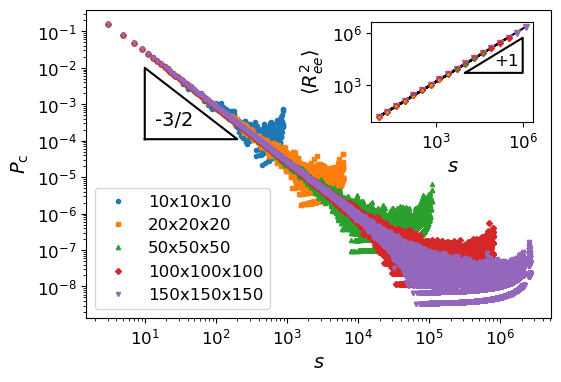

In [11]:
# Section 4: Plot Contact Probability vs Sequence Separation with Inset for Pc(s) and <Ree^2>
fig, ax1 = plt.subplots(figsize=(6, 4))
for i, f in enumerate(folders):
    if f in contact_prob1_data:
        # Plot Pc(s) per system size using distinct markers
        ax1.plot(contact_prob1_data[f][:,0], contact_prob1_data[f][:,1], symbols[i], markersize=3, label=f)
    else:
        print(f"contact_prob1 missing for {f}")
# Slope guide triangle indicating -3/2 scaling
ax1.plot([10, 200, 10, 10], [1.1*10**-4, 1.1*10**-4, 1*10**-2, 1.1*10**-4], '-', color='k', zorder=-10)
ax1.text(14, 2.5*10**-4, "-3/2", fontsize=14)
ax1.set_xscale('log'); ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel(r'$s$', fontsize=14)
ax1.set_ylabel(r'$P_{\rm c}$', fontsize=14)
ax1.legend(fontsize=12, loc="lower left")
# Inset: plot <Ree^2>(s) with error bars and a log-log fit
ax2 = fig.add_axes([0.6, 0.6, 0.27, 0.25])
i=3
for i, f in enumerate(folders):
    ax2.errorbar(reesq1_data[f][:,0], reesq1_data[f][:,1], yerr=reesq1_data[f][:,2], fmt=symbols[i], markersize=i, zorder=-i, linestyle='None')
    i+=4
x = np.concatenate([reesq1_data[f][:,0] for f in folders])  # concat s
y = np.concatenate([reesq1_data[f][:,1] for f in folders])  # concat <Ree^2>
z = np.polyfit(np.log(x), np.log(y), 1)  # slope on log-log
p = np.poly1d(z)
ax2.plot(x, np.exp(p(np.log(x))), 'k', zorder=-10)  # fitted line
# Slope guide (+1)
ax2.plot([10**4, 10**6,10**6, 10**4], [0.5*10**4, 0.5*10**4, 0.5*10**6, 0.5*10**4], '-', color='k', zorder=-10)
ax2.text(10**5, 1.2*10**4, r"+1", fontsize=12)
ax2.set_xscale('log'); ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel(r'$s$', fontsize=14)
ax2.set_ylabel(r'$\langle R_{ee}^2\rangle$', fontsize=14)
plt.savefig("Contact_probability_seqsep_and_Ree_seqsep.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Section 5: Load Contacts and Overlaps Datasets
contacts1_data = np.loadtxt("intra_inter_chain_contacts.dat")  # columns: N, ..., contacts, err
n_overlapping_self_replicas1_data = np.loadtxt("n_overlapping_self_replicas_vs_length_1linear.dat")  # columns: N, overlaps, err

Average exponent overlaps: 0.48619075940160605 ± 0.004826496733397692
Average exponent contacts: 0.9985082279174098 ± 0.00022759450209023768


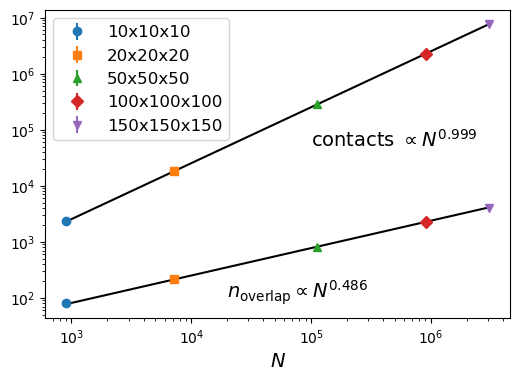

In [13]:
# Section 6: Fit Power Laws for Overlaps and Contacts and Plot on Log-Log Axes
def power_law(x, a, b):
    return a * x**b  # a*N^b

def linear_law(x, m, c):
    return m * x + c  # simple linear utility

plt.figure(figsize=(6,4))
for i in range(len(folders)):
    # Scatter/errorbars for overlaps and contacts vs N
    plt.errorbar(n_overlapping_self_replicas1_data[i,0], n_overlapping_self_replicas1_data[i,1], yerr=n_overlapping_self_replicas1_data[i,2], fmt=symbol_map[folders[i]], markersize=6, linestyle='None', color=color_map[folders[i]], label=folders[i])
    plt.errorbar(contacts1_data[i,0], contacts1_data[i,3], yerr=contacts1_data[i,4], fmt=symbol_map[folders[i]], markersize=6, linestyle='None', color=color_map[folders[i]])
    
# Fit overlaps on even/odd rows to estimate and average exponent b
params, covariance = curve_fit(power_law, n_overlapping_self_replicas1_data[::2,0], n_overlapping_self_replicas1_data[::2,1], sigma=n_overlapping_self_replicas1_data[::2,2], absolute_sigma=True)
a_fit1, b_fit1 = params
b_error1=np.sqrt(np.diag(covariance))[1]
params, covariance = curve_fit(power_law, n_overlapping_self_replicas1_data[1::2,0], n_overlapping_self_replicas1_data[1::2,1], sigma=n_overlapping_self_replicas1_data[1::2,2], absolute_sigma=True)
a_fit2, b_fit2 = params
b_error2=np.sqrt(np.diag(covariance))[1]
b_avg = (b_fit1 + b_fit2) / 2
b_error_avg = np.sqrt(b_error1**2 + b_error2**2) / 2
print(f"Average exponent overlaps: {b_avg} ± {b_error_avg}")
a_fit, b_fit = params
x_fit = np.linspace(min(n_overlapping_self_replicas1_data[:,0]), max(n_overlapping_self_replicas1_data[:,0]), 100)
y_fit = power_law(x_fit, a_fit, b_fit)
plt.plot(x_fit, y_fit, 'k', zorder=-10)
plt.text(2e4, 1e2, r"$n_{\rm overlap} \propto N^{%.3f}$" % b_avg, color='k', fontsize=14)

# Repeat fits for contacts to get exponent b
params, covariance = curve_fit(power_law, contacts1_data[:,0], contacts1_data[:,3], sigma=contacts1_data[:,4], absolute_sigma=True)
a_fit1, b_fit1 = params
b_error1=np.sqrt(np.diag(covariance))[1]
params, covariance = curve_fit(power_law, contacts1_data[::2,0], contacts1_data[::2,3], sigma=contacts1_data[::2,4], absolute_sigma=True)
a_fit2, b_fit2 = params
b_error2=np.sqrt(np.diag(covariance))[1]
params, covariance = curve_fit(power_law, contacts1_data[1::2,0], contacts1_data[1::2,3], sigma=contacts1_data[1::2,4], absolute_sigma=True)
b_avg = (b_fit1 + b_fit2) / 2
b_error_avg = np.sqrt(b_error1**2 + b_error2**2) / 2
print(f"Average exponent contacts: {b_avg} ± {b_error_avg}")
a_fit, b_fit = params
x_fit = np.linspace(min(contacts1_data[:,0]), max(contacts1_data[:,0]), 100)
y_fit = power_law(x_fit, a_fit, b_fit)
plt.plot(x_fit, y_fit, 'k', zorder=-10)
plt.text(1e5, 5e4, r"contacts $\propto N^{%.3f}$" % b_avg, color='k', fontsize=14)
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$N$', fontsize=14)
plt.legend(fontsize=12)
plt.savefig("Contacts_and_noverlaps.pdf", dpi=300, bbox_inches='tight')
plt.show()